# Exploring the Digits Dataset
### In this notebook, you will explore the digits dataset using
### multiple models.
### Follow the comments and markdown cells. Some of the code has been put in for you.
*Note that your output and scores might not be exactly the same as mine, if your random splits are not the same*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

# K means
## Clustering the digits Dataset

In [3]:
#run kmeans, name your model kmeans so that the code below runs
#set n_clusters to 10 
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(digits.data)

#fit and predit
#clusters = kmeans.fit_predict(digits.data)


#print out the array that is the first cluster center
print(kmeans.cluster_centers_)

#print out the inertia
print(kmeans.inertia_)



[[ 0.00000000e+00  5.55111512e-17  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   2.60208521e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   1.30104261e-18  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  0.00000000e+00
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -8.32667268e-17
  -1.08420217e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

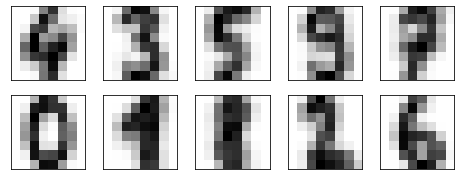

In [4]:
#####run the following code:
#####it graphs the centroid points!

fig, ax = plt.subplots(2, 5, figsize=(8, 3)) #plot with subplots, 2 rows 5 columns
centers = kmeans.cluster_centers_.reshape(10, 8, 8) #reshape the cluster centers to three dimensions
for axi, center in zip(ax.flat, centers): #zip returns an interator of tuples so that each tuple has one of the squares and one of the centers
   axi.set(xticks=[], yticks=[]) #no ticks
   axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary) #imshow() function in pyplot module of matplotlib library is used to display data as an image

# Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state= 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)

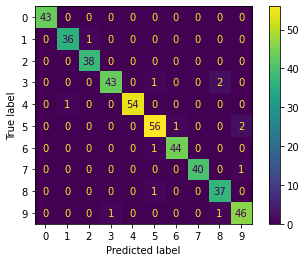

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
#instatiate the LogisticRegression Model
#fit the model to the training data

Xtest = scaler.transform(Xtest) #make sure to scale test data the same way!

#predict the test set
lgmodel = LogisticRegression(max_iter=1000)
lgmodel.fit(Xtrain, ytrain)
preds = lgmodel.predict(Xtest)

#print out the confusion matrix for the test set (or plot it)
plot_confusion_matrix(lgmodel, Xtest, ytest)


# Part 2


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

Xtrain, Xtest, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state= 42)


In [9]:
#instatiate a Decision Tree CLassifier (call it dt so that the code below runs!)
treeclassifier = DecisionTreeClassifier()
#fit to the training data
treeclassifier.fit(Xtrain, Y_train)
#get the train predictions
y_train_pred = treeclassifier.predict(Xtrain)
#get the test predictions
y_test_pred = treeclassifier.predict(Xtest)

In [10]:
tree_score= f1_score(Y_test,y_test_pred)
tree_score

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
#print the accuracy score and the confusion matrix of ytest
print(accuracy_score(ytrain, y_train_pred))
confusion_matrix(Y_train, y_train_pred)

In [ ]:
#run the following code to see a text representation of the tree
from sklearn import tree 
text_representation = tree.export_text(treeclassifier)
print(text_representation)

In [ ]:
#run the following code to see the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeclassifier, feature_names=digits.feature_names, filled=True)

In [ ]:
#use random forest classifier on the digits dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, Y_train, Y_test = train_test_split(digits.data, digits.target,
                                                random_state=0)
#instantiate the RandomForestClassifier model
classifier = RandomForestClassifier()
#fit the model to the training data
classifier.fit(Xtrain, Y_train)
#predict to get the prediction values for the test set
Y_pred = classifier.predict(Xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#print the confusion matrix for the Random Forest Predictions
confusion_matrix(Y_test, Y_pred)